In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\ali.rizvi\Downloads\california_housing_train.csv")
pd.set_option('display.max_rows', 12)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [35]:
print(df['population'].max(), ",", df['population'].min())

35682.0 , 3.0


In [31]:
pd.set_option('display.max_rows', 20)
df.sort_values(by = 'housing_median_age')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13708,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0
10993,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0
1353,-117.17,34.12,2.0,3867.0,573.0,1275.0,433.0,5.4138,164400.0
8765,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0
8672,-118.56,34.42,2.0,966.0,270.0,233.0,169.0,1.9667,450000.0
...,...,...,...,...,...,...,...,...,...
15193,-122.27,37.89,52.0,2640.0,366.0,973.0,355.0,7.2660,371100.0
15192,-122.27,37.89,52.0,3046.0,373.0,975.0,365.0,8.8342,430500.0
15190,-122.27,37.90,52.0,1803.0,240.0,572.0,236.0,6.1740,358800.0
15209,-122.27,37.85,52.0,1974.0,426.0,875.0,363.0,1.5817,153600.0


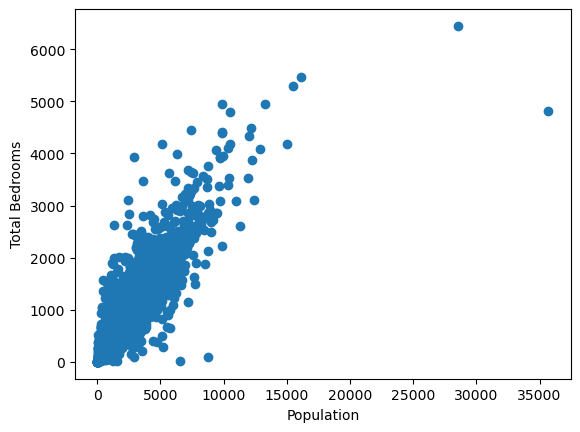

In [6]:
# Let's Look at Total Bedrooms in Relation to Population
import matplotlib.pyplot as plt

pop = df['population'] ## Taking out Columns of the DataFrame
bdrooms = df['total_bedrooms']

plt.scatter(pop, bdrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms') ## We Are Going to Make a Linear Regression Model - A Straight Line that Fits through the Plots - to Predict the Amount of Bedrooms by a Given Population Number
plt.figsize=(8,6)

In [12]:
# Converting the Series Objects into NumPy Arrays
pop_np = pop.to_numpy()
bdrooms_np = bdrooms.to_numpy()

pop_np.shape, bdrooms_np.shape ## "(17000,)" means they only have 17000 Rows & No Columns

((17000,), (17000,))

In [13]:
# Now, to make a Linear Regression model, we Begin my Importing It form the Scikit-Learn Library
from sklearn.linear_model import LinearRegression as LR

In [52]:
# Building the Final Fitting Model

## 1.
sklearn_model = LR().fit(pop_np.reshape((17000, 1)), bdrooms_np) ### The "fit()" gets the Data we have and Returns the Best-fit line

### For the pop_np reshaping, we are telling it  we have 17000 Rows and Only 1 Column - the x-axis Value/Input

## 2.
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1))) 
## This is for Predicted Y-Values corresponding to any Inputs in the X-axis. ^For any given x-value, get the Expected y-value
## For the "predict()", we only need to feed in the Inputs (the "Population" reshaped set)
sklearn_bedroom_predictions.shape

(17000,)

In [57]:
# Getting the Alpha and Beta values Calculated

from sklearn.linear_model import LinearRegression as LR

# Fit the model to the data
sklearn_model = LR().fit(pop_np.reshape((-1, 1)), bdrooms_np) ## For Reshaping, ""-1" is used as a placeholder to automatically determine the number of rows based on the size of the original array.
## The "1" in "(-1, 1)" Reshaping: Specifies the number of columns in the reshaped array.

# Predict using the fitted model
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((-1, 1)))

# Get the intercept (alpha) and coefficient (beta) from the fitted model
alpha = sklearn_model.intercept_
beta = sklearn_model.coef_[0]  # For a simple linear regression model, there is only one coefficient

# Printing the Beta and Alpha Values for our Subsequent Analysis
print("Intercept (alpha):", alpha.round(2))
print("Coefficient (beta):", beta.round(2))

Intercept (alpha): 76.84
Coefficient (beta): 0.32


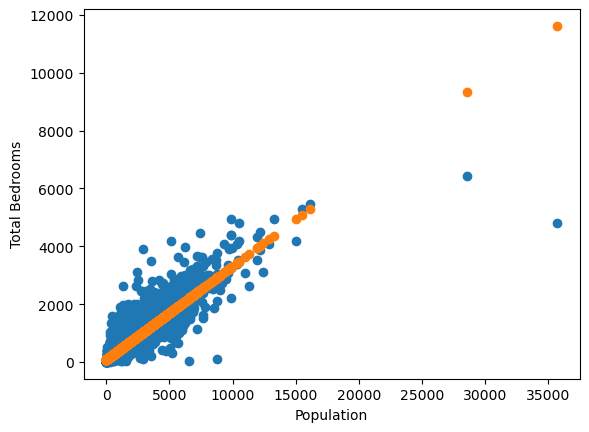

In [15]:
# Finally, Plotting In the Best-Fit Line
pop = df['population']
bdrooms = df['total_bedrooms']

plt.scatter(pop, bdrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.figsize=(8,6)

plt.scatter(pop, sklearn_bedroom_predictions) # We can see that for all Associated Inputs ('Population' values), it predicted Outputs (corresponding 'Total Bedrooms' values)

In [16]:
preds_df = pd.DataFrame({'Population': pop, 
                         'Bedrooms': bdrooms,
                         'sklearn Bedroom Amount Predictions': sklearn_bedroom_predictions})
preds_df

,Population,Bedrooms,sklearn Bedroom Amount Predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [ ]:
# For now, Considering all we have done, We Can Say We Are Assuming:
## Total Bedrooms = Alpha + Beta(Population) + Error

# Generally:
## y(i) = alpha + beta*x(i) + error # "i" denotes any given value of x or y

In [ ]:
# Now, we will Create a "Model" which will Estimate the Output Values and will not include an Error in the Calculation

## Model: y_hat(i) = alpha_hat + [beta_hat + x(i)] ### "hat" means an 'estimated' value

## Learning "Parameters" of this Model: 'alpha_hat' and 'beta_hat': We are Trying to Learn them - we can never Know the True Values of both but we are going to Try to Estimate them as Precisely as we can

In [9]:
def get_predictions(model, x):
    '''
    Obtain the Predictions for the given Model and Inputs
    model: {'alpha_hat': Number, 'beta_hat': Number}
    x: np.array of Floats with shape (n,) of inputs
    
    Returns: np.array of Floats with shape (n,).
    ''' 
    alpha_hat = model['alpha_hat']
    beta_hat = model['beta_hat']
    
    return alpha_hat + beta_hat * x ## This Returns Predictions in a NumPy Array of Floats with shape (n,)

In [ ]:
# The lines contianed within the '''s above are "Docstrings"
## Docstrings are used to document the purpose, parameters, return values, and other relevant information about functions, classes, or modules.

In [58]:
# Now, we will Test our "get_predictions" Function

test_model = {'alpha_hat': 76.84, 'beta_hat': 0.32} ## These are our Estimated y-intercept ("alpha_hat") and Estimated Coefficient ("beta_hat"), as Calculated before
test_x = np.array([1, 4, 7]) ## Our Inputs - What will our Linear Model Produce When We Have These Inputs? The Next Line will Show! 
get_predictions(test_model, test_x) ## get_predictions('model', 'inputs')

## The Final Result here was "77.16, 78.12, 79.08"; Makes Perfect Sense Due to How We Defined - e.g., when Input was '1', (76.84) + (0.32)(1) = "77.16"!
## The Final Simple Linear Regression Equation = 76.84 + 0.32*x

array([77.16, 78.12, 79.08])

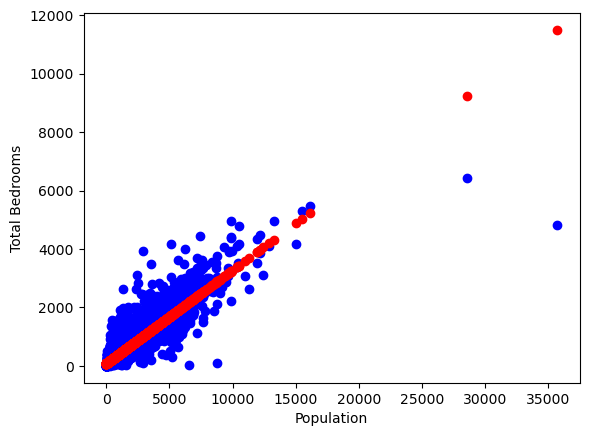

In [59]:
# Plotting the Predictions with the Actual Plot

plt.scatter(pop, bdrooms, color='blue')
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.figsize=(8,6)

## The "test_model" will have an equation of "76.84 + 0.32x"; as we Defined it before
plt.scatter(pop, get_predictions(test_model, pop_np), color='red') ## "pop": the Independent (predictor/feature) variable; the Estimated "Population" after using the Predictive Equation
plt.show()

## "get_predictions(test_model, pop_np)": the Dependent variable, often referred to as the response variable in the context of linear regression. It represents the predicted values obtained from the linear regression model (test_model) when given the Population data as Input.
##^ Has specific Population values ("pop_np" values) put in to the Estimator equation ("76.84 + 0.32x") to Give Estimated Population ("pop") Values

## Plotting the actual population data ("pop") against the Predicted values ("get_predictions(test_model, pop_np)"")

In [61]:
# To confirm the Predicted Regression line's outputs, let's plug in the Max Population value from the Sample, which is "35682.0" as Calculated Earlier
## Plugged into the Estimator Equation: "76.84 + 0.32(35682.0)"
76.84 + 0.32*(35682.0) ## Returns a Value of "11495.08" and we can see that on the Graph too, referring to the x-axis at "35682.0" and Seeing its Corresponding y-value at fairly above 100000

11495.08

In [32]:
# Getting the Mean Squared Error Given the Observed and Predicted Outputs

def mean_squared_error(y, y_predictions):
    '''
    y: np.array of Floats with shape (n,) of Observed Outputs
    y_predictions: np.array of Floats with shape (n,) of Predicted Outputs
    
    Returns: Float representing the Mean Squared Error (MSE).
    '''
    
    n = len(y) # And the Total Amount of "y_predictions" and "y" should be the Same
    return np.sum(np.square(y - y_predictions)) / n ## For "Mean Absolute Error", all would have been the same - Just "np.square" would have been Replaced with "np.abs"

In [33]:
mse1 = mean_squared_error(get_predictions(test_model, pop_np), bdrooms) # 'Bedrooms' ("bdrooms") is the Output; 'get_predictions(test_model, pop_np)': the supposedly Actual Metrics Assumed by the Function
mse1

23549577.56382353

In [36]:
# Getting the Mean Absolute Error Given the Observed and Predicted Outputs

def mean_absolute_error(y, y_predictions):
    '''
    y: np.array of Floats with shape (n,) of Observed Outputs
    y_predictions: np.array of Floats with shape (n,) of Predicted Outputs
    
    Returns: Float representing the Mean Absolute Squared Error (MAE).
    '''
    
    n = len(y) # And the Total Amount of "y_predictions" and "y" should be the Same
    return np.sum(np.abs(y - y_predictions)) / n

mae1 = mean_absolute_error(get_predictions(test_model, pop_np), bdrooms) # 'Bedrooms' ("bdrooms") is the Output; 'get_predictions(test_model, pop_np)': the supposedly Actual Metrics Assumed by the Function
mae1 # On Average, our Linear Model is Off by *mae1 value* (either Direction)

3751.581705882353

In [38]:
def get_best_model(x, y):
    '''
    Returns the Model with the Parameters that Minimize the MSE.
    
    x: np.array of Floats with shape (n,) of inputs
    y: np.array of Floats with shape (n,) of outputs
    
    Returns: {'alpha_hat': Float, 'beta_hat': Float} representing the model
    '''
    
    x_bar = np.average(x)
    y_bar = np.average(y)
    
    top = np.sum((x - x_bar)*(y - y_bar))
    bottom = np.sum((x - x_bar)**2)
    
    beta_hat = top / bottom
    alpha_hat = y_bar - beta_hat*x_bar
    
    model = {'alpha_hat': alpha_hat, 'beta_hat': beta_hat}
    
    return model

best_model = get_best_model(pop_np, bdrooms_np)
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

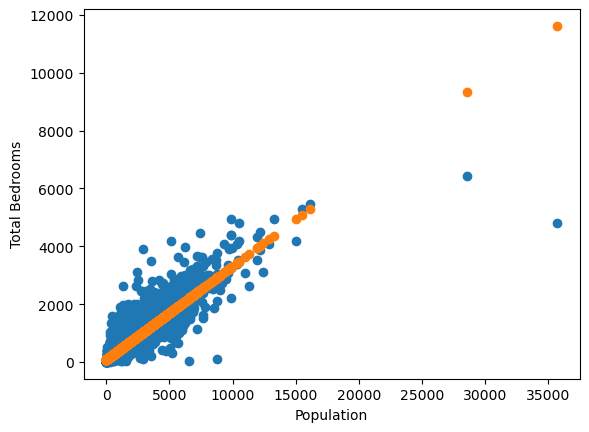

In [39]:
# Plotting the Best Model

plt.scatter(pop, bdrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.figsize=(8,6)

plt.scatter(pop, get_predictions(best_model, pop_np)) ## Predictions, Given Population values, from the Best Model

## See? This One is Much Closer to the Actual Plot

In [40]:
# Adding the Best Model - as a Column - to Our DataFrame to See Values

preds_df['Best Model Predictions'] = get_predictions(best_model, pop_np)
preds_df

,Population,Bedrooms,sklearn Bedroom Amount Predictions,Best Model Predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296


<Axes: >

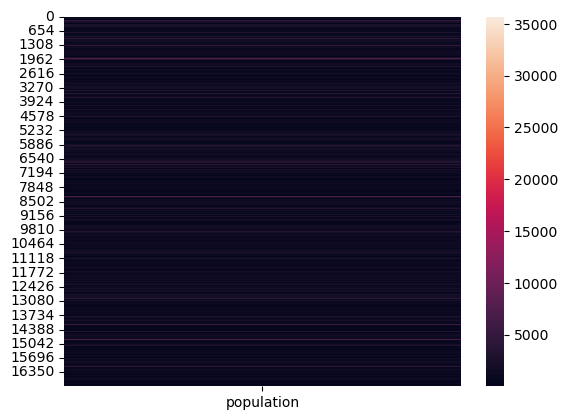

In [47]:
import seaborn as sns
sns.heatmap(df[['population']])